### Install some required packages

In [1]:
!pip install numpy
!pip install matplotlib
!pip install ffmpeg-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image
%matplotlib inline


C:\Users\metwa\anaconda3\envs\car_analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


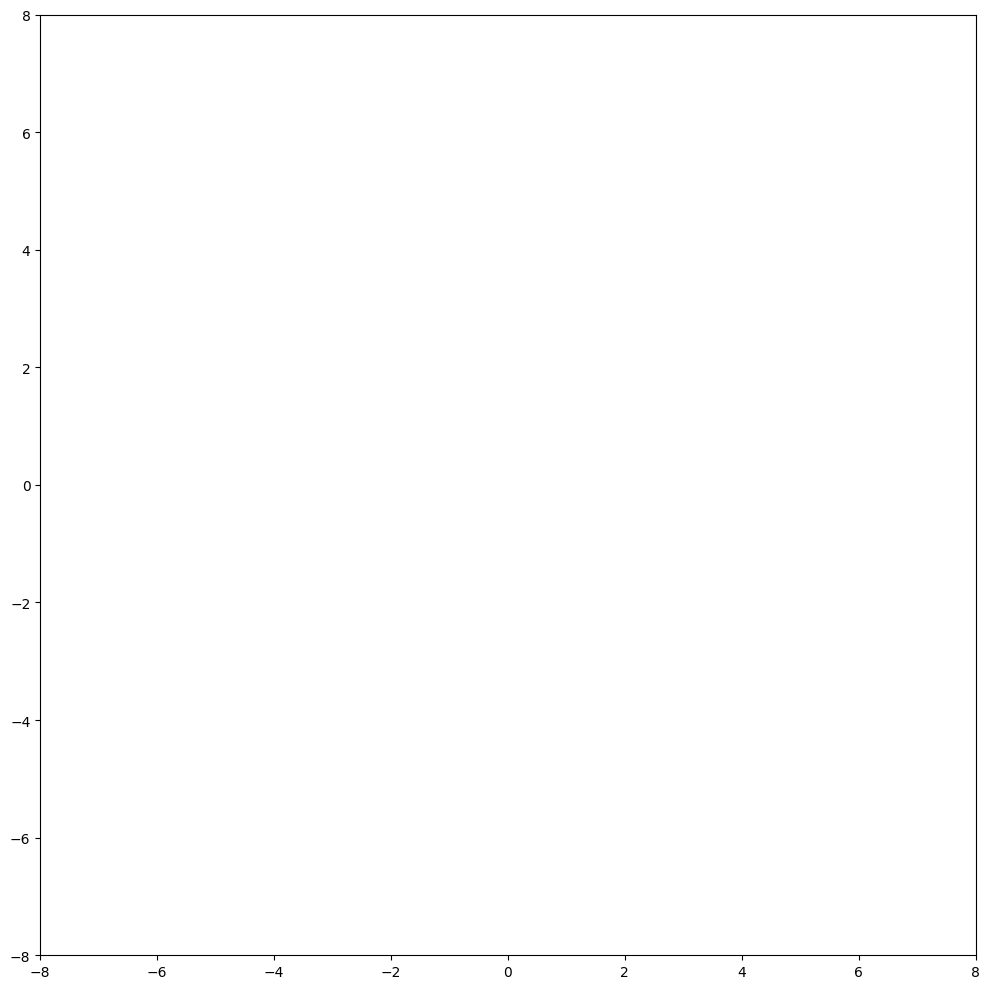

In [3]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['animation.html'] = 'html5'

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -8, 8))
ax.set_ylim((-8, 8))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

In [5]:
anim # if this produces an error then try and follow the steps here: https://suryadayn.medium.com/error-requested-moviewriter-ffmpeg-not-available-easy-fix-9d1890a487d3

RuntimeError: Requested MovieWriter (ffmpeg) not available

TypeError: Poly3DCollection.set_3d_properties() takes 1 positional argument but 2 were given

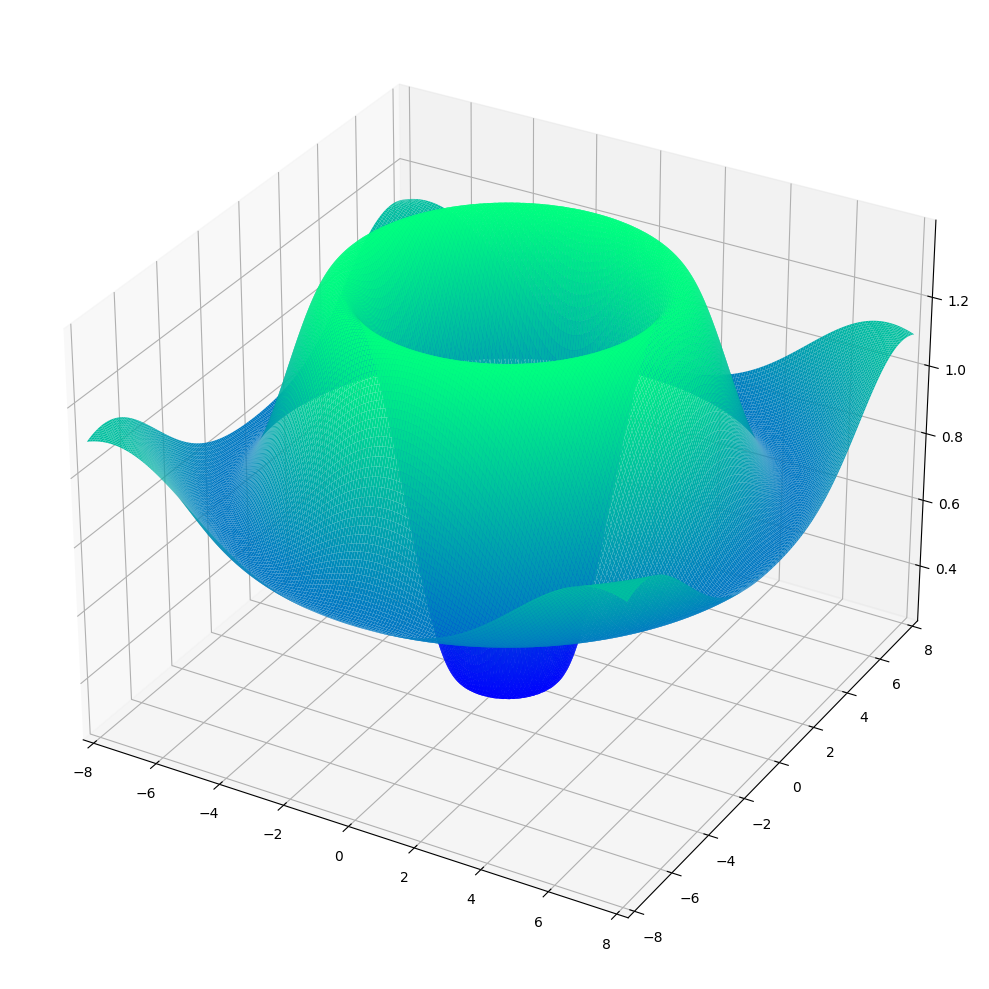

In [6]:
fig = plt.figure()
ax = plt.axes(projection="3d")
def z_function(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    return 1 - np.sin(r)*np.exp(-r/5)

x = np.linspace(-8, 8, 200)
y = np.linspace(-8, 8, 200)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax.set_xlim(( -8, 8))
ax.set_ylim((-8, 8))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='none')


def init():
    surf.set_3d_properties([])
    return surf

# animation function. This is called sequentially
def animate(i):
    max_val = int(i/100 * 16) - 8
    min_val = 8 - int(i/100 * 16)
    x = np.linspace(-8, max_val, 2*i)
    y = np.linspace(min_val, 8, 2*i)
    X, Y = np.meshgrid(x, y)
    Z = z_function(X, Y)
    surf.set_data(X,Y,Z)
    return (surf,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

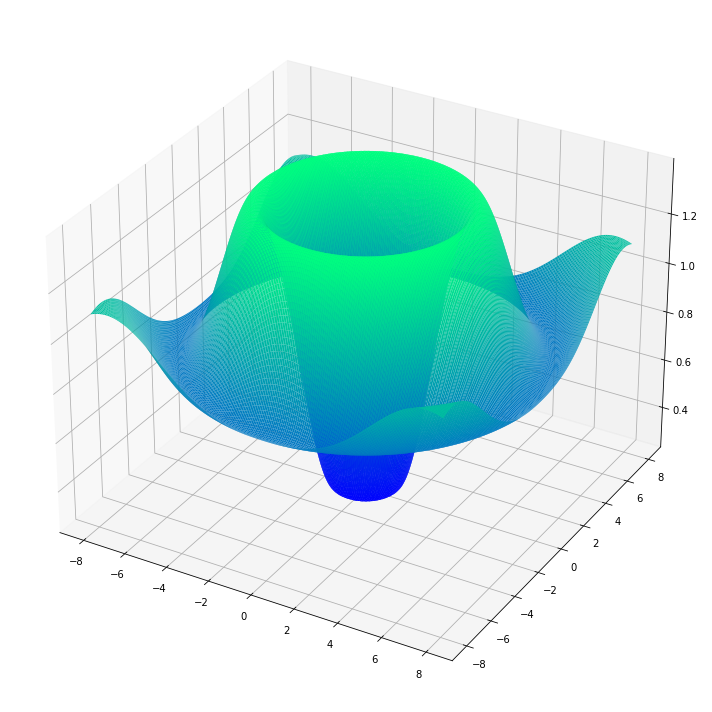

In [4]:
fig = plt.figure()
ax = plt.axes(projection="3d")
def z_function(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    return 1 - np.sin(r)*np.exp(-r/5)

x = np.linspace(-8, 8, 200)
y = np.linspace(-8, 8, 200)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
plt.savefig('myimg.svg')

In [5]:
def animate(i):
    def z_function(x, y):
        r = np.sqrt(x ** 2 + y ** 2)
        return 1 - np.sin(r)*np.exp(-r/5)
    subx = X[:i,:i]
    suby = Y[-i:,-i:]
    subz = Z_function(subx, suby)
    ax.clear()
    ax.plot_surface(subx, suby, subz, rstride=1, cstride=1, cmap='winter', edgecolor='none')


In [6]:
ani = FuncAnimation(fig, animate, interval=1000)

NameError: name 'FuncAnimation' is not defined

In [ ]:
ani

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


n_points = 200

def z_function(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    return 1 - np.sin(r)*np.exp(-r/5)

x = np.linspace(-8, 8, n_points)
y = np.linspace(-8, 8, n_points)
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

def update_curve(num):
    surf.set_data(X[:num,:num], Y[:num,:num], Z[:num,:num])
    surf.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

surf = ax.plot_surface(X[0:1, 0:1], Y[0:1, 0:1], Z[0:1, 0:1], rstride=1, cstride=1, cmap='winter', edgecolor='none')

# Setting the axes properties
ax.set_xlim3d([-8.0, 8.0])
ax.set_xlabel('x')

ax.set_ylim3d([-8.0, 8.0])
ax.set_ylabel('y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('f(x,y)')

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_curve, frames=100, interval=50, blit=False)

ValueError: not enough values to unpack (expected 5, got 0)

<Figure size 720x720 with 1 Axes>

In [23]:
ani

NameError: name 'ani' is not defined

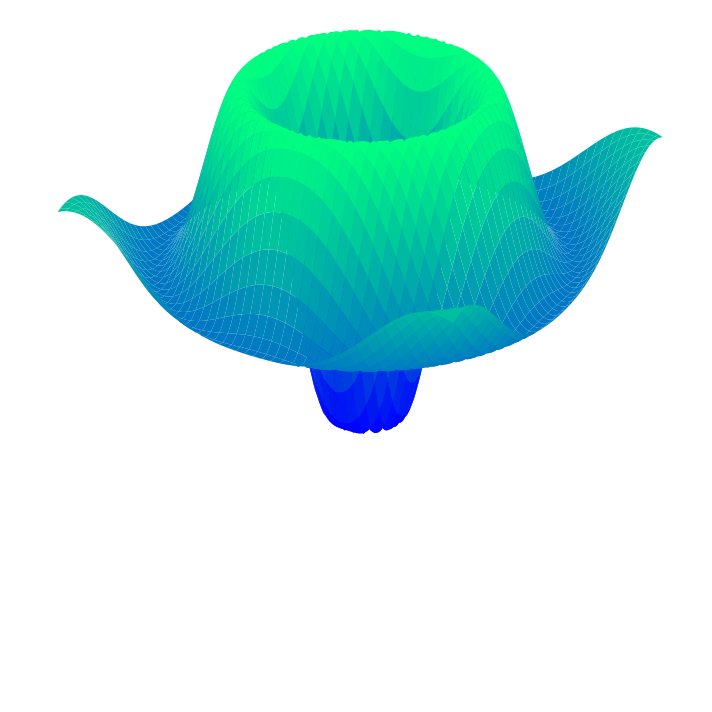

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

N = 400
fps = 30
frn = N // 2
start = 10

x = np.linspace(-8, 8, N + 1)
x, y = np.meshgrid(x, x[::-1])
f = lambda x, y: 1 - np.sin(np.sqrt(x ** 2 + y ** 2)) * np.exp(-np.sqrt(x ** 2 + y ** 2)/5)
z = f(x,y)

def change_plot(frame_number, plot):
    idx = slice(0, 2*frame_number + start)
    subx, suby, subz = x[idx, idx], y[idx, idx], z[idx, idx]
    plot[0].remove()
    plot[0] = ax.plot_surface(subx, suby, subz, cmap="winter")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plot = [ax.plot_surface(x[:start,:start], y[:start,:start], z[:start,:start], cmap='winter', rstride=1, cstride=1)]

# Setting the axes properties
ax.set_xlim3d([-8.0, 8.0])
ax.set_xlabel('x')

ax.set_ylim3d([-8.0, 8.0])
ax.set_ylabel('y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('f(x,y)')
ax.axis('off')

for frame_number in range(start, frn):
    change_plot(frame_number, plot)
    plt.savefig(f"plot/im-{frame_number}.png")

In [28]:
ani = animation.FuncAnimation(fig, change_plot, frn, fargs=(plot), interval=1000 / fps)

ax.axis('off')

(-8.0, 8.0, -8.0, 8.0)